In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("car details v4.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [ ]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [6]:
#Preprocessing Max power column
default_value = '0 bhp @ 0 rpm'
df['Max Power'].fillna(default_value, inplace=True)

# splitting bhp and rpm
df[['Horse_power','Engine_rpm']]=df["Max Power"].str.split('@',expand=True)

# extracting int value from columns
df['Horse_power'] = pd.to_numeric(df['Horse_power'].str.replace(' bhp', ''), errors='coerce')
df['Engine_rpm'] = pd.to_numeric(df['Engine_rpm'].str.replace(' rpm', ''), errors='coerce')

In [7]:
mean_engine_speed=df['Engine_rpm'].mean()
df['Engine_rpm'].fillna(mean_engine_speed,inplace=True)

In [8]:
#Preprocessing Max torque column
default_value = '0 Nm @ 0 rpm'
df['Max Torque'].fillna(default_value, inplace=True)

# spliiting bhp and rpm
df[['Torque_power','Torque_rpm']]=df["Max Torque"].str.split('@',expand=True)

# extracting int value from columns
df['Torque_power'] = pd.to_numeric(df['Torque_power'].str.replace(' Nm', ''), errors='coerce')
df['Torque_rpm'] = pd.to_numeric(df['Torque_rpm'].str.replace(' rpm', ''), errors='coerce')

In [9]:
df.drop(columns="Max Power",inplace=True)
df.drop(columns="Max Torque",inplace=True)

In [10]:
#Removing cc from engine column
df["Engine"] = df["Engine"].str.replace("cc", "").astype(float)

In [11]:
mean_engine_value = df["Engine"].mean()
df["Engine"].fillna(value=mean_engine_value, inplace=True)

In [12]:
# handling nan value in length,width,height
m_len=df["Length"].mean()
m_wid=df["Width"].mean()
m_height=df["Height"].mean()

df["Height"].fillna(m_height,inplace=True)

df["Width"].fillna(m_wid,inplace=True)

df["Length"].fillna(m_len,inplace=True)

In [13]:
# handling nan value in seating capacity
df["Seating Capacity"].fillna(df["Seating Capacity"].mean(),inplace=True)

In [14]:
# handling nan value in fuel tank
df["Fuel Tank Capacity"].fillna(df["Fuel Tank Capacity"].mean(),inplace=True)

In [15]:
np.random.seed(1)
drive_train_counts = df['Drivetrain'].value_counts()

# Generate random choices for all missing values using 'replace=True'
random_choices = np.random.choice(drive_train_counts.index, size=df['Drivetrain'].isnull().sum(), p=drive_train_counts.values / drive_train_counts.sum(), replace=True)

# Fill missing values with randomly chosen 'fwd', 'rwd', and 'awd'
df.loc[df['Drivetrain'].isnull(), 'Drivetrain'] = random_choices

In [16]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Horse_power           0
Engine_rpm            0
Torque_power          0
Torque_rpm            0
dtype: int64

In [17]:
order_col = ['Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location','Seller Type','Color', 'Seller Type', 'Engine',
             'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
             'Fuel Tank Capacity', 'Horse_power', 'Engine_rpm']

df1 = df[order_col].copy()

In [18]:
df1

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Seller Type,Color,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Horse_power,Engine_rpm
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Corporate,Grey,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.00000,87.0,6000.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,Individual,White,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.00000,74.0,4000.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Individual,Maroon,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.00000,79.0,6000.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Individual,Red,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.00000,82.0,6000.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Individual,Grey,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.00000,148.0,3400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,Individual,White,Individual,2179.0,FWD,4585.0,1890.0,1785.0,7.0,70.00000,138.0,3750.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,Individual,White,Individual,814.0,FWD,3495.0,1550.0,1500.0,5.0,32.00000,55.0,5500.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Individual,Silver,Individual,1196.0,FWD,3795.0,1680.0,1427.0,5.0,45.00000,70.0,6250.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,Individual,White,Individual,1995.0,RWD,4936.0,1868.0,1479.0,5.0,65.00000,188.0,4000.0


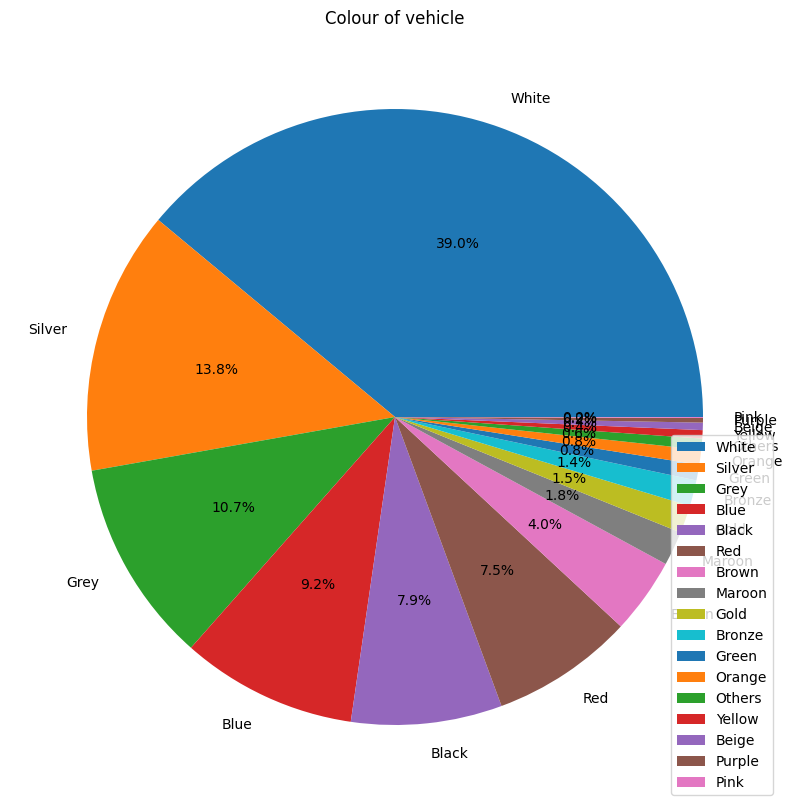

In [22]:
plt.figure(figsize=(10,10))
color_counts = df1["Color"].value_counts()
plt.pie(color_counts, labels=color_counts.index,autopct='%1.1f%%')
plt.legend(loc="lower right")
plt.title("Colour of vehicle")
plt.show()

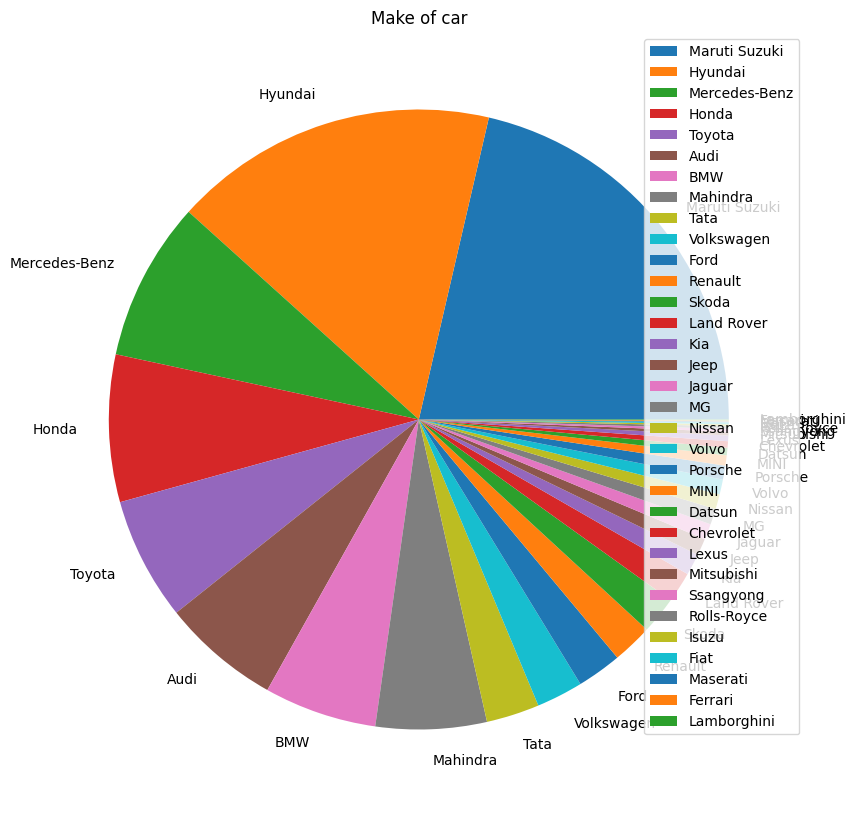

In [23]:
plt.figure(figsize=(10,20))
count_make=df1["Make"].value_counts()
plt.pie(count_make,labels=count_make.index)
plt.legend(loc="upper right")
plt.title("Make of car")
plt.show()

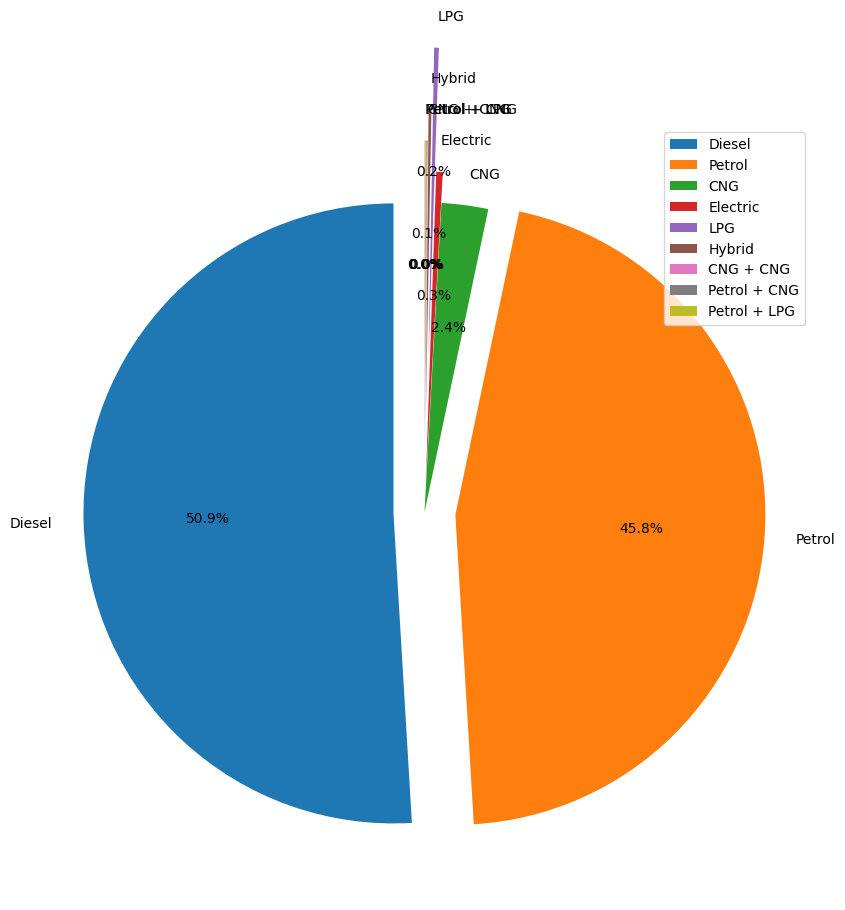

In [ ]:
plt.figure(figsize=(10,20))
explode = [0.1, 0.1, 0, 0.1,0.5,0.3,0.2,0.2,0.2]
count_fuel_typ=df1["Fuel Type"].value_counts()
plt.pie(count_fuel_typ,labels=count_fuel_typ.index, autopct='%1.1f%%', startangle=90,explode=explode)
plt.legend()
plt.show()

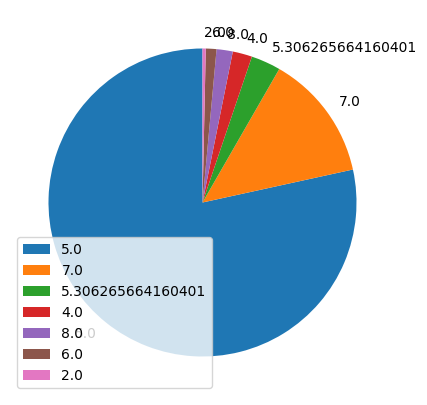

In [ ]:
plt.figure(figsize=(10,5))
seat=df1["Seating Capacity"].value_counts()
plt.pie(seat,labels=seat.index,startangle=90)
plt.legend()
plt.show()

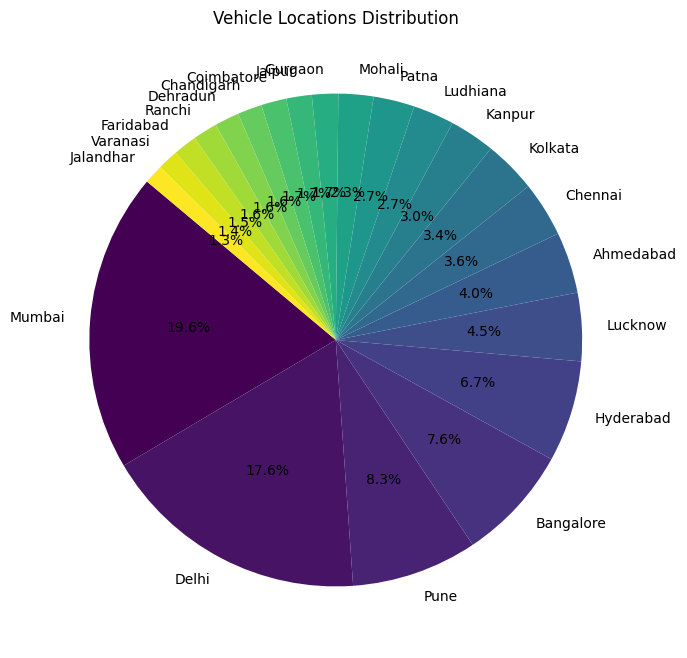

In [ ]:
location_counts = df1['Location'].value_counts()
filtered_locations = location_counts[location_counts > 20]

plt.figure(figsize=(10, 8))
filtered_locations.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Vehicle Locations Distribution')
plt.ylabel('')
plt.show()

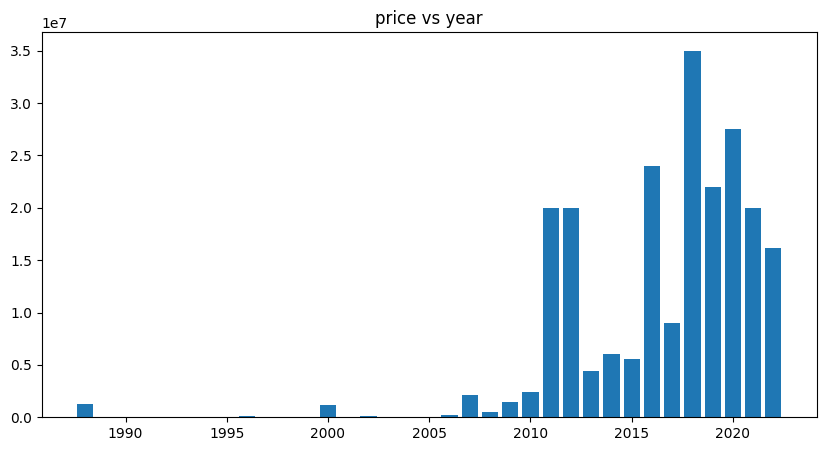

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df1["Year"],df1["Price"])
plt.title("price vs year")
plt.show()

In [24]:
seg_variable1 = ['Price','Fuel Type', 'Location', 'Transmission','Color','Seating Capacity']
fes1=df1[seg_variable1].copy()
feat=df1[seg_variable1].copy()

In [25]:
dfp=fes1.copy()

In [26]:
# Mapping categorical features to numerical values
fuel_mapping = {fuel: idx for idx, fuel in enumerate(df["Fuel Type"].unique())}
transmission_mapping = {trans: idx for idx, trans in enumerate(df["Transmission"].unique())}
color_mapping = {color: idx for idx, color in enumerate(df["Color"].unique())}
location_mapping = {location: idx for idx, location in enumerate(df["Location"].unique())}

In [27]:
dfp['Fuel_Type_Encoded'] = dfp['Fuel Type'].map(fuel_mapping)
dfp['Transmission_Encoded'] = dfp['Transmission'].map(transmission_mapping)
dfp['Color_Encoded'] = dfp['Color'].map(color_mapping)
dfp['Location_Encoded'] = dfp['Location'].map(location_mapping)

In [28]:
# Dropping the original categorical columns
dfp.drop(['Fuel Type', 'Transmission', 'Color', 'Location'], axis=1, inplace=True)

In [29]:
dfp

,Price,Seating Capacity,Fuel_Type_Encoded,Transmission_Encoded,Color_Encoded,Location_Encoded
0,505000,5.0,0,0,0,0
1,450000,5.0,1,0,1,1
2,220000,5.0,0,0,2,2
3,799000,5.0,0,0,3,3
4,1950000,7.0,1,0,0,4
...,...,...,...,...,...,...
2054,850000,7.0,1,0,1,47
2055,275000,5.0,0,0,1,22
2056,240000,5.0,0,0,6,29
2057,4290000,5.0,1,1,1,5


In [30]:
# Selecting relevant features for clustering
numerical_columns = ['Price', 'Seating Capacity']

In [31]:
scaler = StandardScaler()
dfp[numerical_columns] = scaler.fit_transform(dfp[numerical_columns])

In [32]:
dfp

,Price,Seating Capacity,Fuel_Type_Encoded,Transmission_Encoded,Color_Encoded,Location_Encoded
0,-0.495183,-0.378532,0,0,0,0
1,-0.517916,-0.378532,1,0,1,1
2,-0.612986,-0.378532,0,0,2,2
3,-0.373659,-0.378532,0,0,3,3
4,0.102099,2.093385,1,0,0,4
...,...,...,...,...,...,...
2054,-0.352579,2.093385,1,0,1,47
2055,-0.590252,-0.378532,0,0,1,22
2056,-0.604719,-0.378532,0,0,6,29
2057,1.069324,-0.378532,1,1,1,5


In [33]:
data_dfp=dfp.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

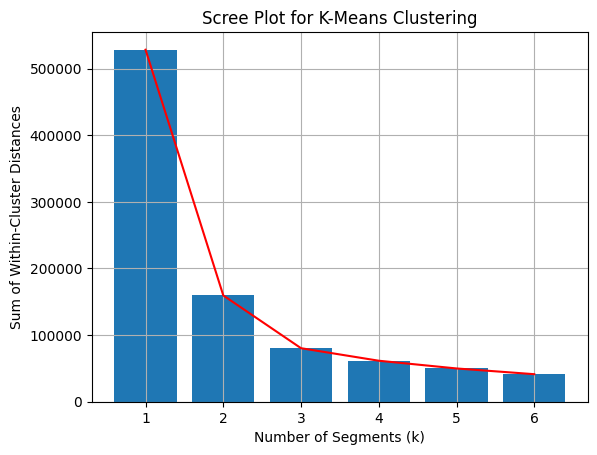

In [34]:
num_segments=[]
sum_distances=[]
for i in range(1,7):
    kmean=KMeans(n_clusters=i)
    kmean.fit(data_dfp)
    num_segments.append(i)
    sum_distances.append(kmean.inertia_)
#Plot the sum of within-cluster distances vs. number of segments
plt.bar(num_segments, sum_distances)
plt.plot(num_segments,sum_distances,color="red")
plt.xlabel('Number of Segments (k)')
plt.ylabel('Sum of Within-Cluster Distances')
plt.title('Scree Plot for K-Means Clustering')
plt.grid(True)
plt.show()

In [35]:
kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(data_dfp)
labels=kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
df_cluster=pd.concat([dfp,pd.DataFrame({"cluster":labels})],axis=1)
df_cluster

,Price,Seating Capacity,Fuel_Type_Encoded,Transmission_Encoded,Color_Encoded,Location_Encoded,cluster
0,-0.495183,-0.378532,0,0,0,0,1
1,-0.517916,-0.378532,1,0,1,1,1
2,-0.612986,-0.378532,0,0,2,2,1
3,-0.373659,-0.378532,0,0,3,3,1
4,0.102099,2.093385,1,0,0,4,1
...,...,...,...,...,...,...,...
2054,-0.352579,2.093385,1,0,1,47,2
2055,-0.590252,-0.378532,0,0,1,22,0
2056,-0.604719,-0.378532,0,0,6,29,0
2057,1.069324,-0.378532,1,1,1,5,1


<ipython-input-40-29f4cc4497cf>:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dens1, x=column, ax=ax[i], label='Cluster 1')
<ipython-input-40-29f4cc4497cf>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dens2, x=column, ax=ax[i], label='Cluster 2')
<ipython-input-40-29f4cc4497cf>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dens3, x=column, ax=ax[i], label='Cluster 2')


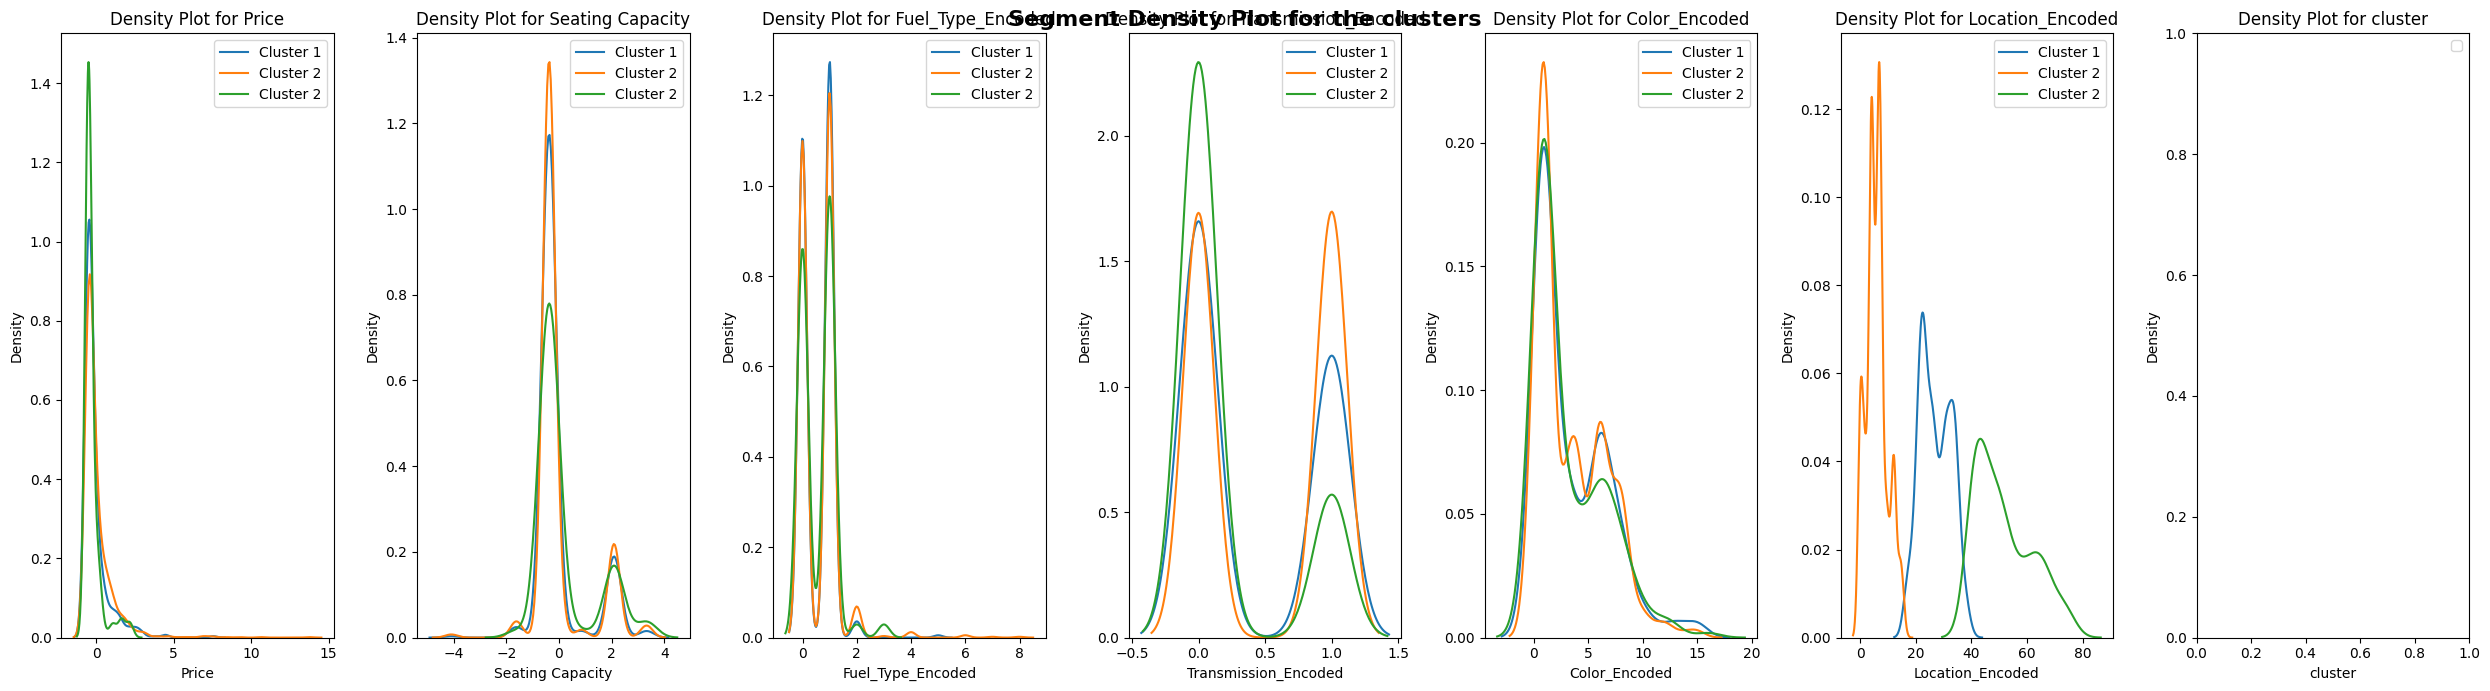

In [40]:
dens1=df_cluster[df_cluster["cluster"]==0]
dens2=df_cluster[df_cluster["cluster"]==1]
dens3=df_cluster[df_cluster["cluster"]==2]

dens1.drop("cluster",axis=1)
dens2.drop("cluster",axis=1)
dens3.drop("cluster",axis=1)

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(25, 7))


numerical_columns =list(dens1.columns)

for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=dens1, x=column, ax=ax[i], label='Cluster 1')
    sns.kdeplot(data=dens2, x=column, ax=ax[i], label='Cluster 2')
    sns.kdeplot(data=dens3, x=column, ax=ax[i], label='Cluster 2')
    ax[i].set_title(f'Density Plot for {column}')
    ax[i].legend()

plt.tight_layout()
plt.suptitle("Segment Density Plot for the clusters", fontsize=16, fontweight='bold')
plt.show()

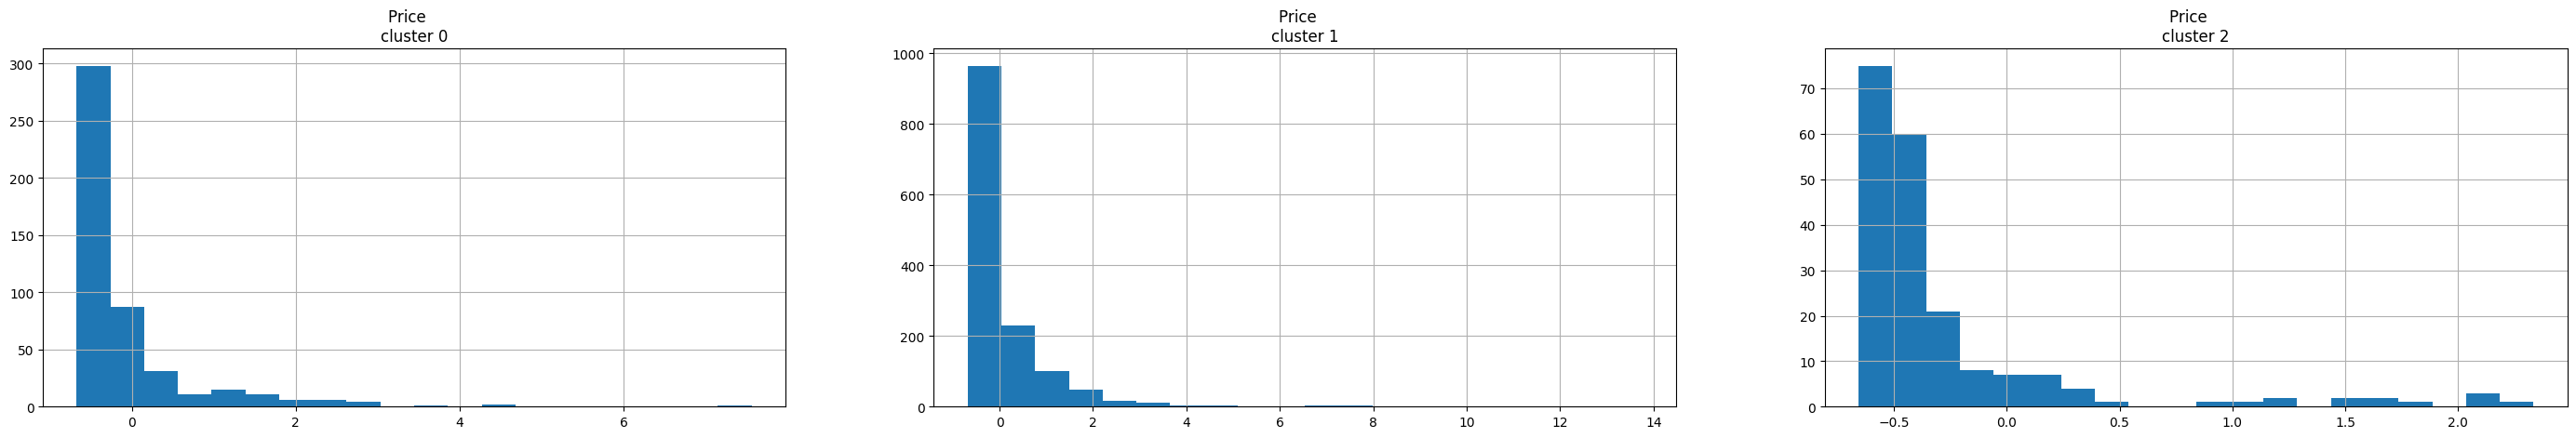

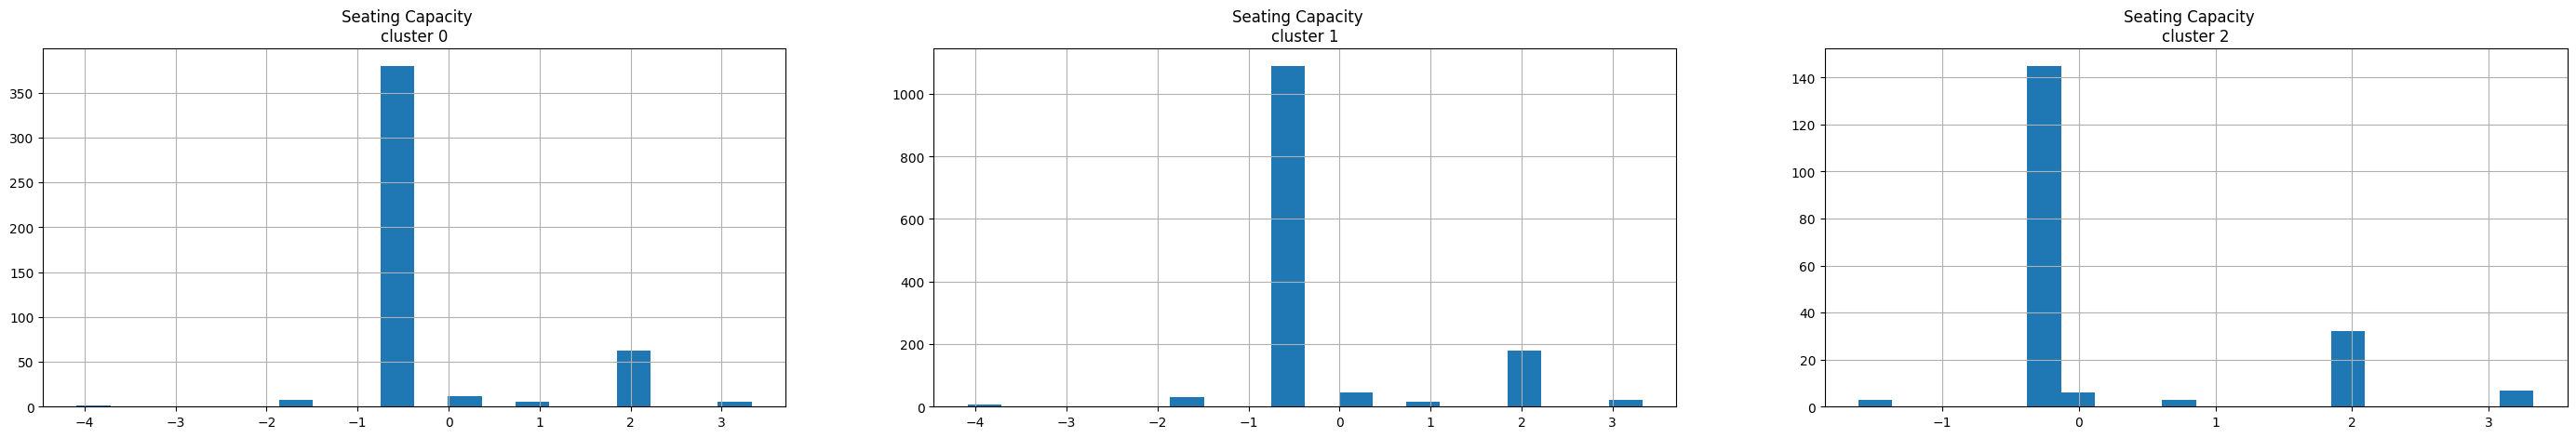

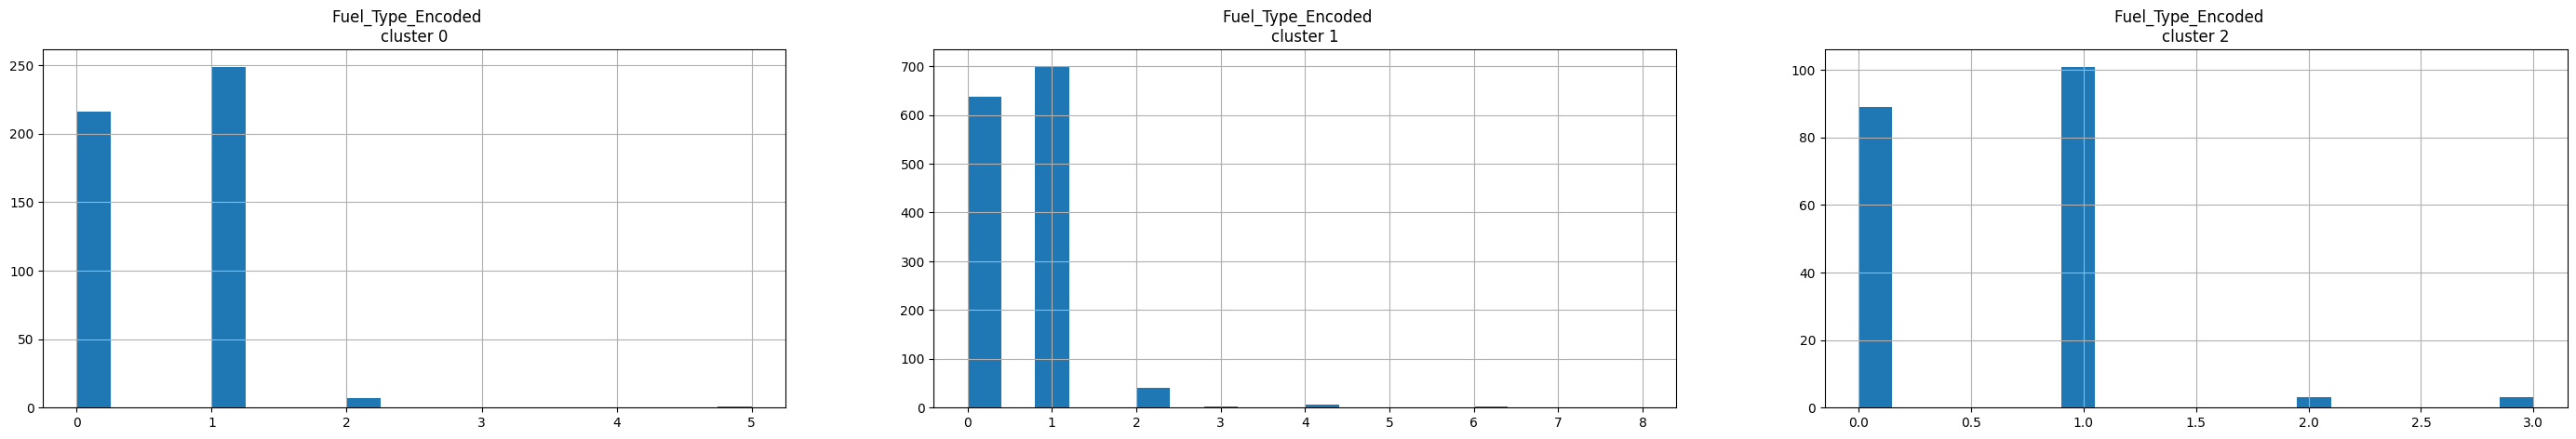

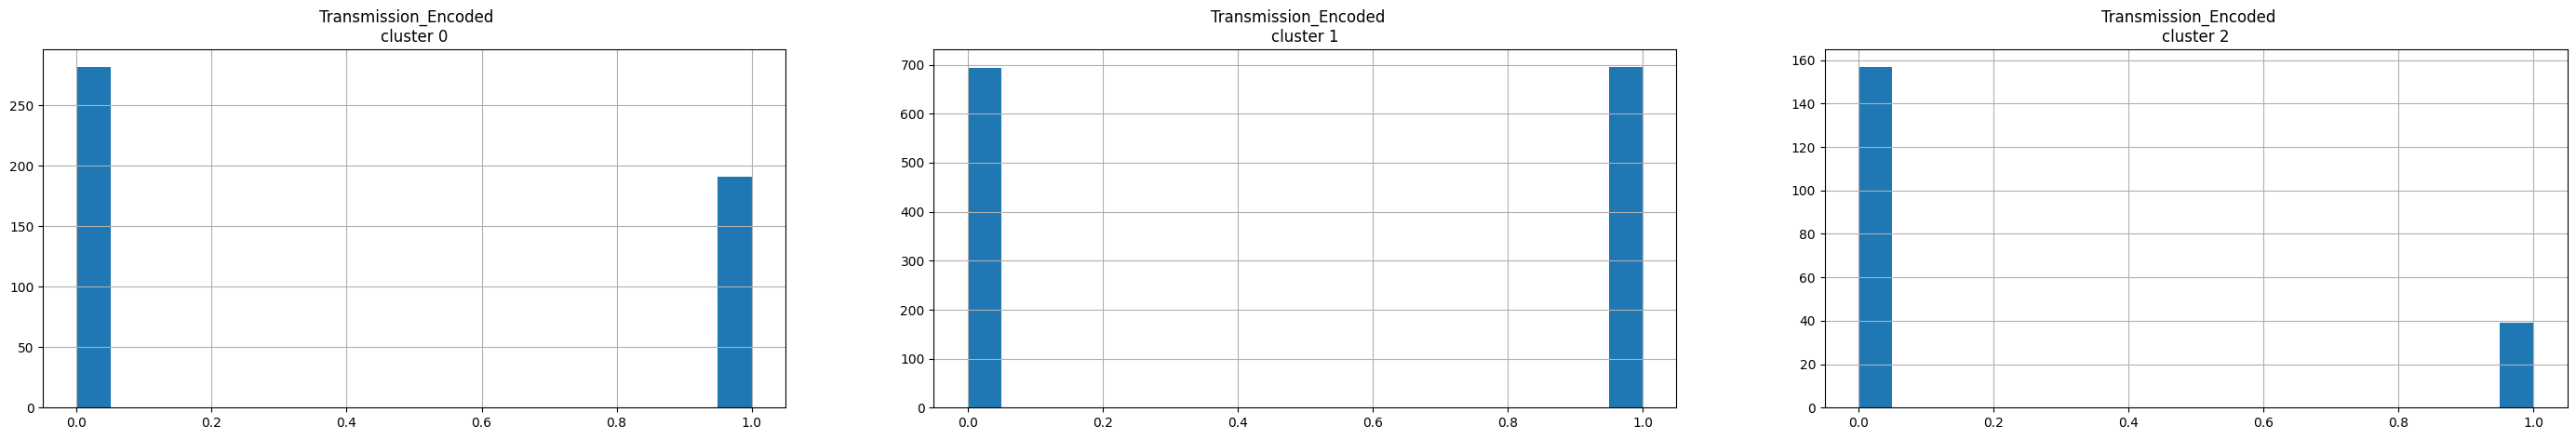

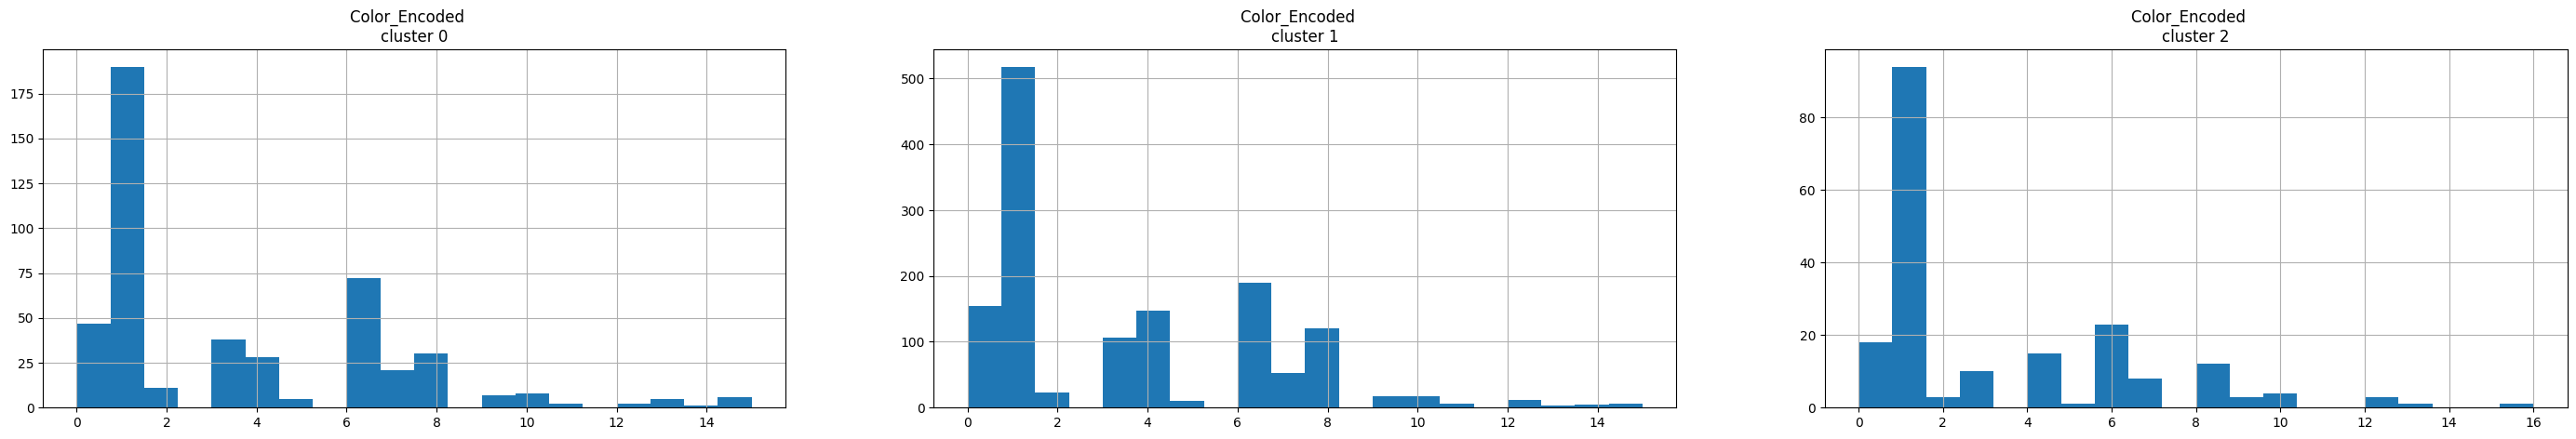

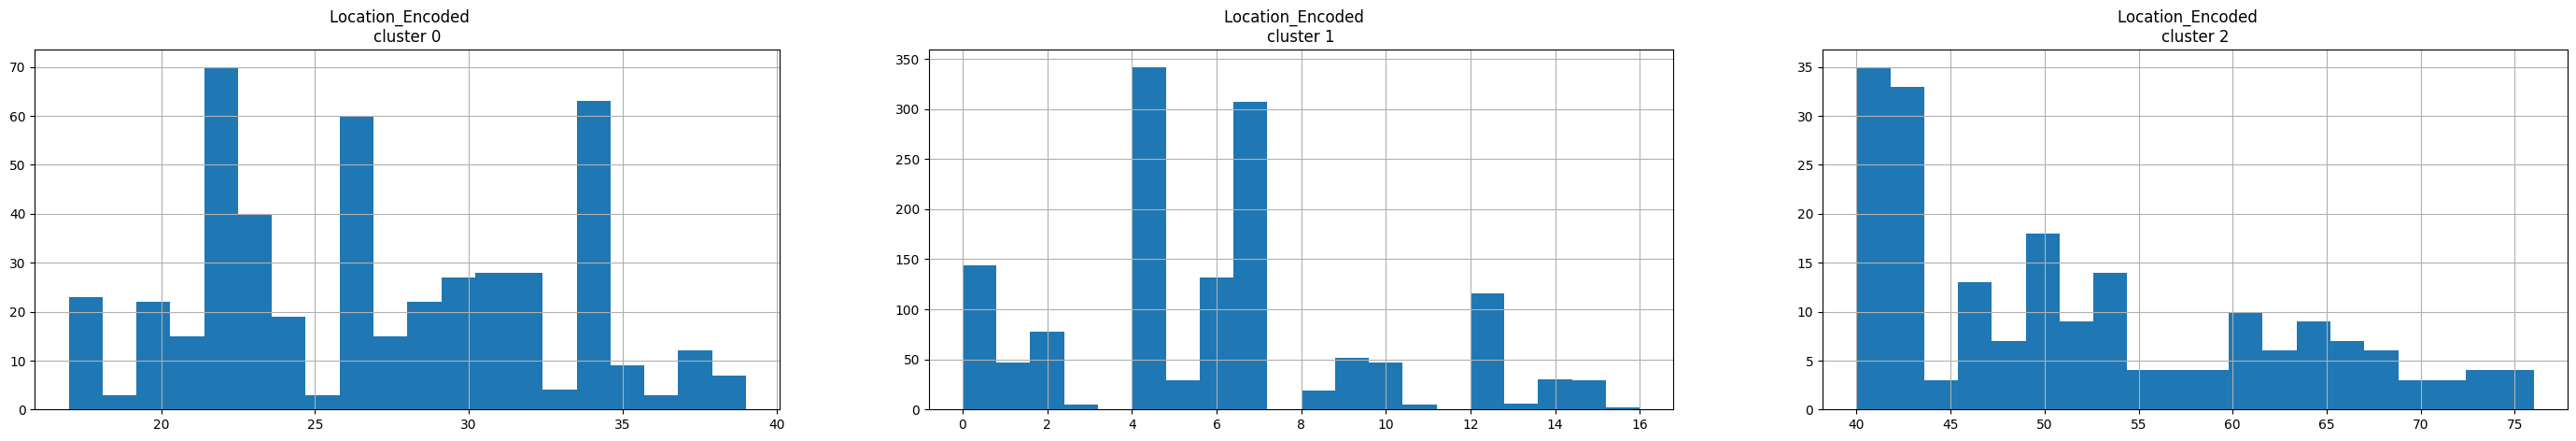

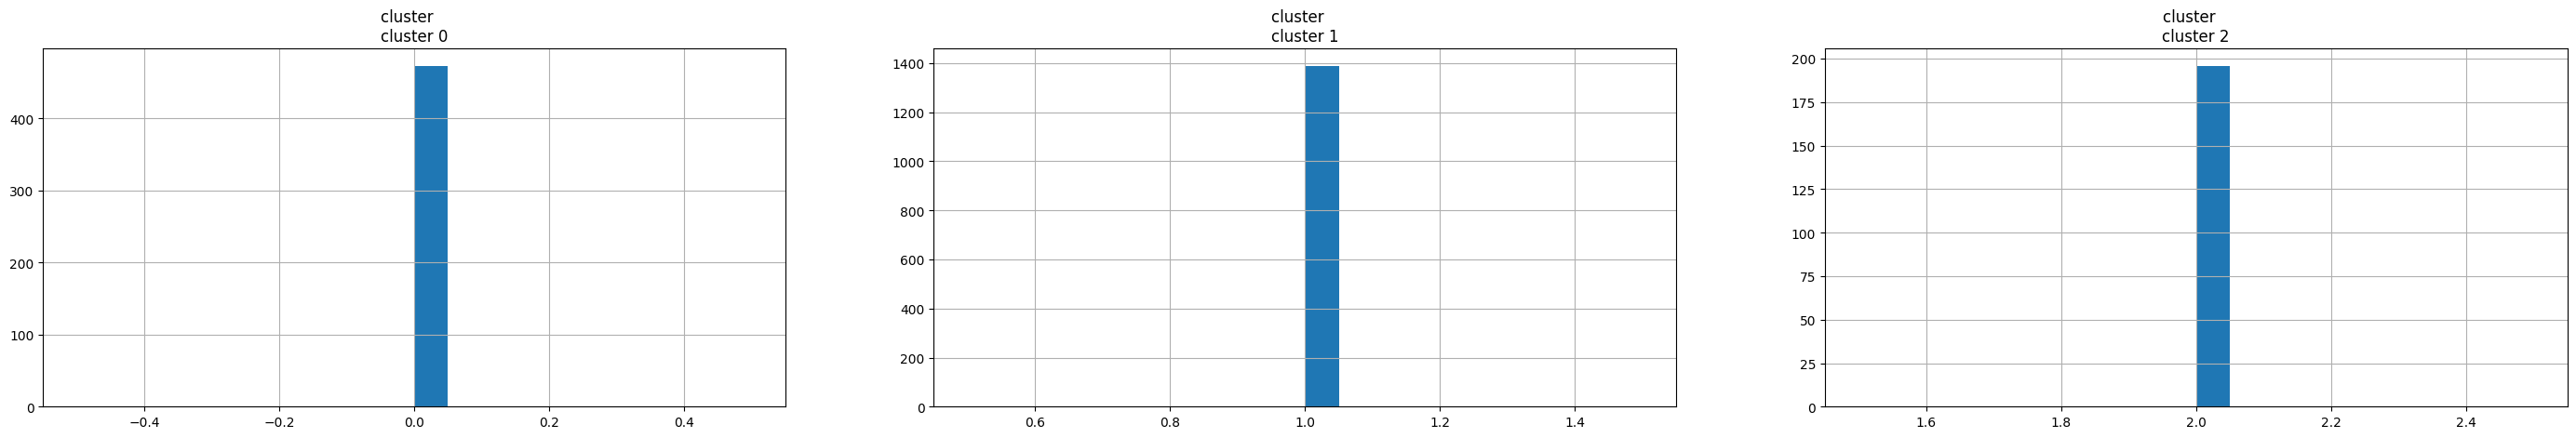

In [38]:
for i in range(len(df_cluster.columns)):
    plt.figure(figsize=(35, 5))
    for j in range(len(df_cluster['cluster'].unique())):  # Loop through each unique cluster
        plt.subplot(1, len(df_cluster['cluster'].unique()), j + 1)
        data = df_cluster[df_cluster['cluster'] == j]
        data[df_cluster.columns[i]].hist(bins=20)
        plt.title('{}   \ncluster {}'.format(df_cluster.columns[i], j))
    plt.show()

In [41]:
pca=PCA(n_components=2)

pc_data=pca.fit_transform(dfp.values)

pr_comp=pca.components_
pca_df1=pd.DataFrame(data=pc_data,columns=['PC1','PC2'])
pca_df1.head()

,PC1,PC2
0,-15.076701,-3.470158
1,-14.082128,-2.471317
2,-13.085439,-1.461699
3,-12.091633,-0.455327
4,-11.074272,-3.474851


In [42]:
labels=kmean.labels_
pca_df1=pd.concat([pca_df1,pd.DataFrame({"cluster":labels})],axis=1)

In [43]:
pca_df1

,PC1,PC2,cluster
0,-15.076701,-3.470158,1
1,-14.082128,-2.471317,1
2,-13.085439,-1.461699,1
3,-12.091633,-0.455327,1
4,-11.074272,-3.474851,1
...,...,...,...
2054,31.921551,-2.271444,2
2055,6.918036,-2.365177,0
2056,13.894372,2.667601,0
2057,-10.098212,-2.429481,1


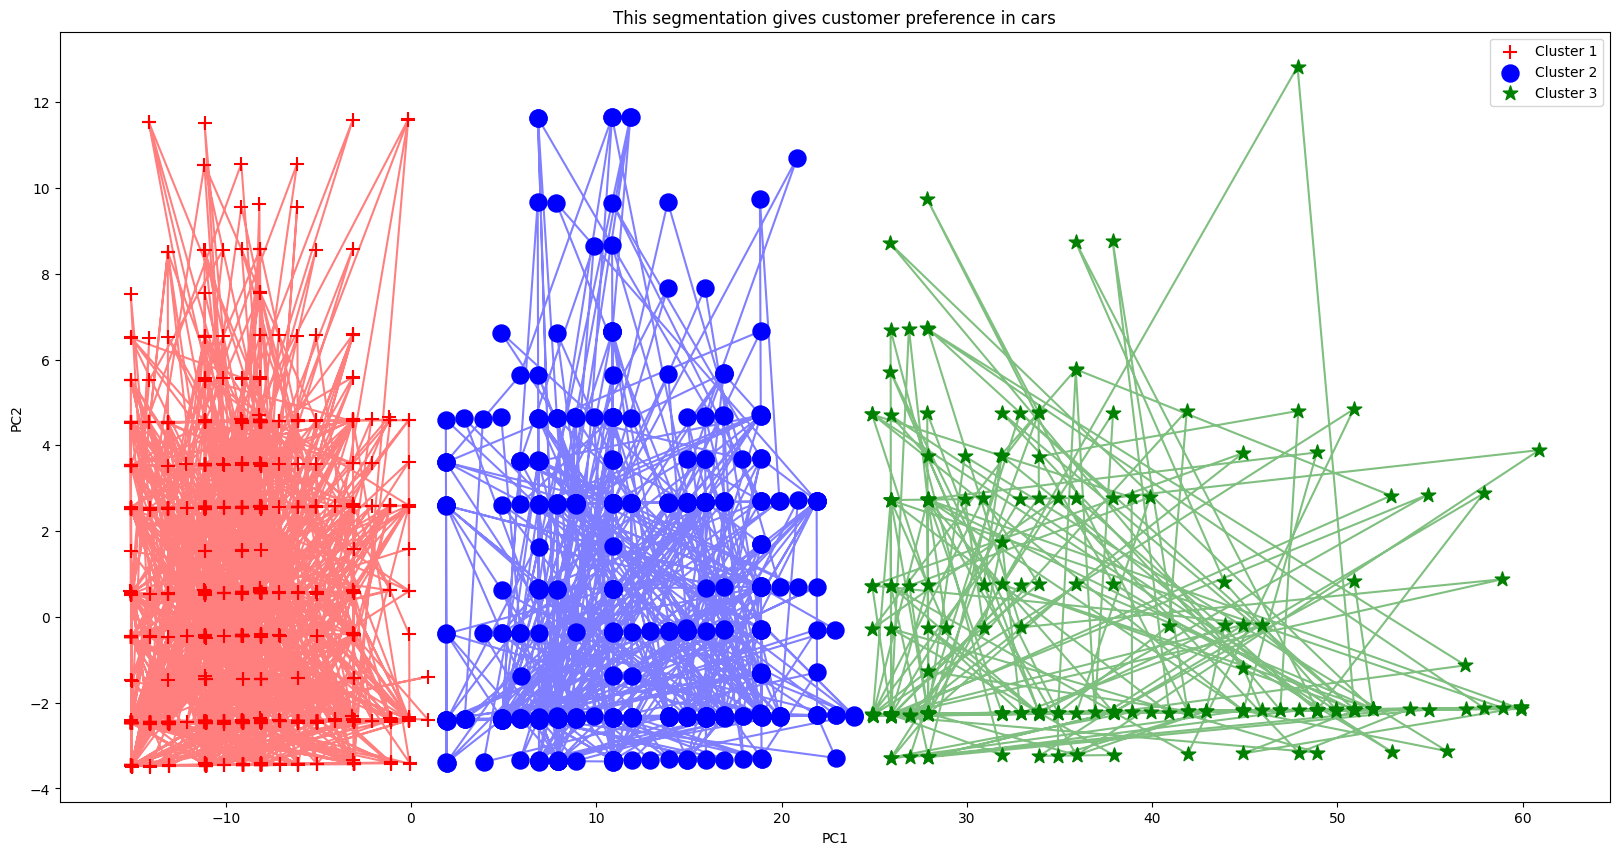

In [44]:
plt.figure(figsize=(20, 10))
segments = pca_df1["cluster"].unique()

colors = ["red", "blue","green"]
markers = ["+","o" ,"*"]
labels = ["Cluster 1", "Cluster 2", "Cluster 3", ]
sizes = [100, 150, 120]

for i, segment in enumerate(segments):
    segment_data = pca_df1[pca_df1["cluster"] == segment]

    plt.scatter(segment_data["PC1"], segment_data["PC2"], color=colors[i % len(colors)],marker=markers[i % len(markers)], s=sizes[i % len(sizes)], label=labels[i % len(labels)])

    plt.plot(segment_data["PC1"], segment_data["PC2"], color=colors[i % len(colors)], linestyle="-", alpha=0.5)

plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Segment Separation Plot")
plt.title("This segmentation gives customer preference in cars")
plt.show()

In [45]:
labels=kmean.labels_
lab=pd.concat([fes1,pd.DataFrame({"cluster":labels})],axis=1)

In [46]:
segment=[]
for i in range(3):
    data=lab[lab["cluster"]==i]
    segment.append(data)

In [47]:
lab

,Price,Fuel Type,Location,Transmission,Color,Seating Capacity,cluster
0,505000,Petrol,Pune,Manual,Grey,5.0,1
1,450000,Diesel,Ludhiana,Manual,White,5.0,1
2,220000,Petrol,Lucknow,Manual,Maroon,5.0,1
3,799000,Petrol,Mangalore,Manual,Red,5.0,1
4,1950000,Diesel,Mumbai,Manual,Grey,7.0,1
...,...,...,...,...,...,...,...
2054,850000,Diesel,Surat,Manual,White,7.0,2
2055,275000,Petrol,Ahmedabad,Manual,White,5.0,0
2056,240000,Petrol,Thane,Manual,Silver,5.0,0
2057,4290000,Diesel,Coimbatore,Automatic,White,5.0,1


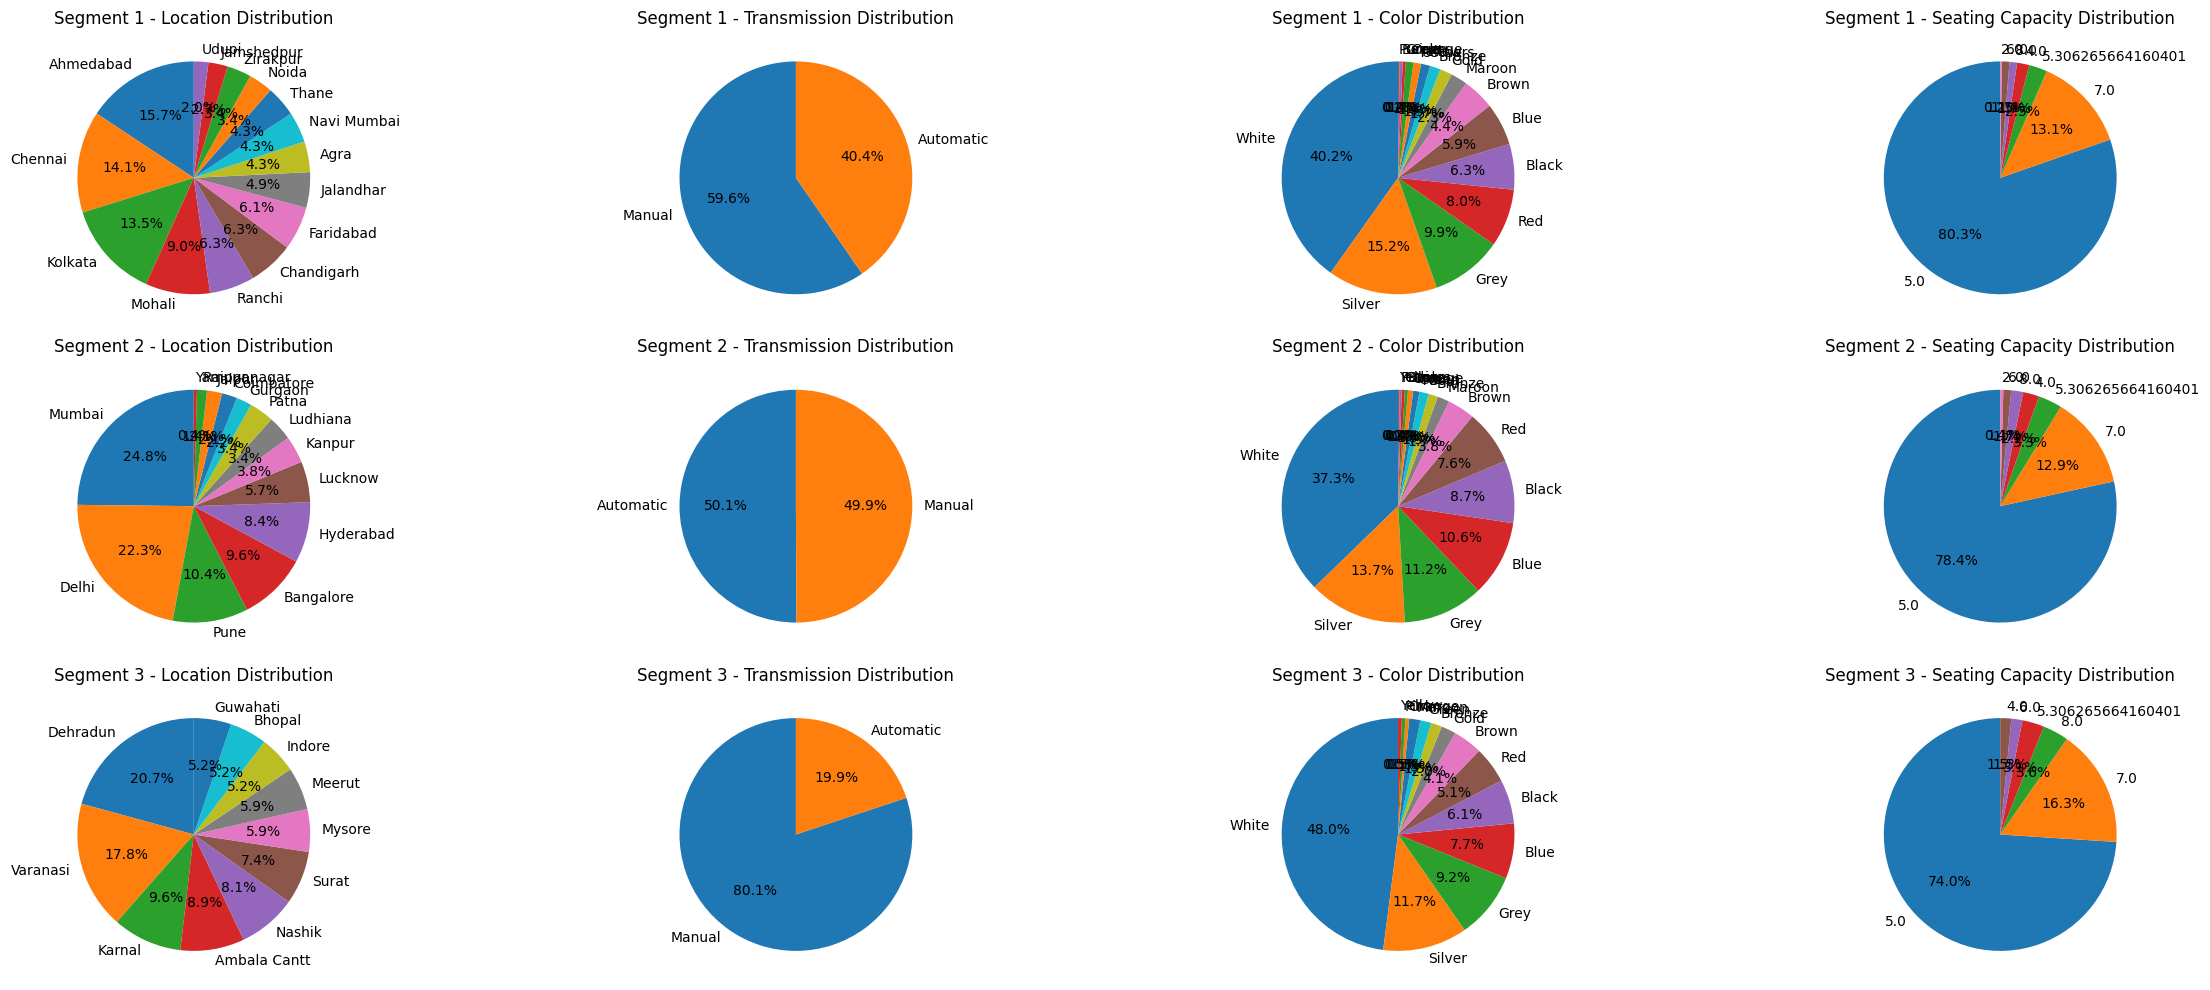

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 10))

columns = ['Location', 'Transmission', 'Color', 'Seating Capacity']

for idx, j in enumerate(columns):
    for i in range(3):
        filtered_data = segment[i]

        if j == 'Location':
            # Only consider locations with more than 20 occurrences
            location_counts = filtered_data['Location'].value_counts()
            locations_to_keep = location_counts[location_counts > 5].index
            filtered_data = filtered_data[filtered_data['Location'].isin(locations_to_keep)]

        # Get the value counts for each filtered cluster and column
        co_count = filtered_data[j].value_counts()

        # Plot the pie chart
        axes[i, idx].pie(co_count, labels=co_count.index, autopct='%1.1f%%', startangle=90)
        axes[i, idx].set_title(f"Segment {i+1} - {j} Distribution")

plt.tight_layout()

sns.set_style('whitegrid')
sns.despine()  # Remove the spines from the plot

plt.show()

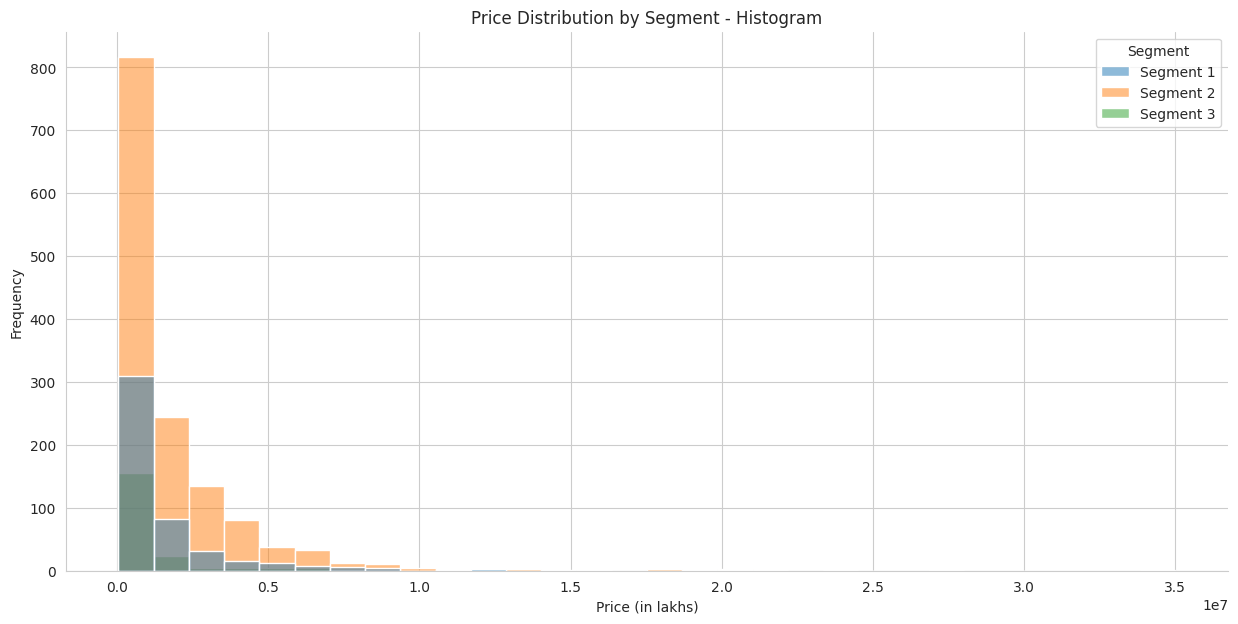

In [54]:
combined_data = []
for i, seg in enumerate(segment):
    seg_copy = seg.copy()
    seg_copy['Segment'] = f'Segment {i+1}'
    combined_data.append(seg_copy)

combined_data = pd.concat(combined_data)

plt.figure(figsize=(15, 7))
sns.histplot(data=filtered_data, x='Price', hue='Segment', bins=30, kde=False)
plt.title('Price Distribution by Segment - Histogram')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [55]:
def map_price_to_range(price):
    if price <= 500000:
        return '[1-5] Lakhs'
    elif price <= 1000000:
        return '[5-10] Lakhs'
    elif price <= 1500000:
        return '[10-15] Lakhs'
    else:
        return '[15-20] Lakhs'

# Apply the custom function to the 'Price' column to get the price ranges
lab['Price_Range'] = lab['Price'].apply(map_price_to_range)
cluster_1_data = lab[lab['cluster'] == 0]
cluster_2_data = lab[lab['cluster'] == 1]
cluster_3_data = lab[lab['cluster'] ==2]
ct_1=cluster_1_data["Price_Range"].value_counts()
ct_2=cluster_2_data["Price_Range"].value_counts()
ct_3=cluster_3_data["Price_Range"].value_counts()
ct=[ct_1,ct_2,ct_3]

In [56]:
ct[0]

Price_Range
[5-10] Lakhs     147
[1-5] Lakhs      147
[15-20] Lakhs    128
[10-15] Lakhs     51
Name: count, dtype: int64

<ipython-input-60-8764a2ee7f74>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, 0].set_xticklabels(ct[i].index, rotation=45)
<ipython-input-60-8764a2ee7f74>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, 0].set_xticklabels(ct[i].index, rotation=45)
<ipython-input-60-8764a2ee7f74>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, 0].set_xticklabels(ct[i].index, rotation=45)


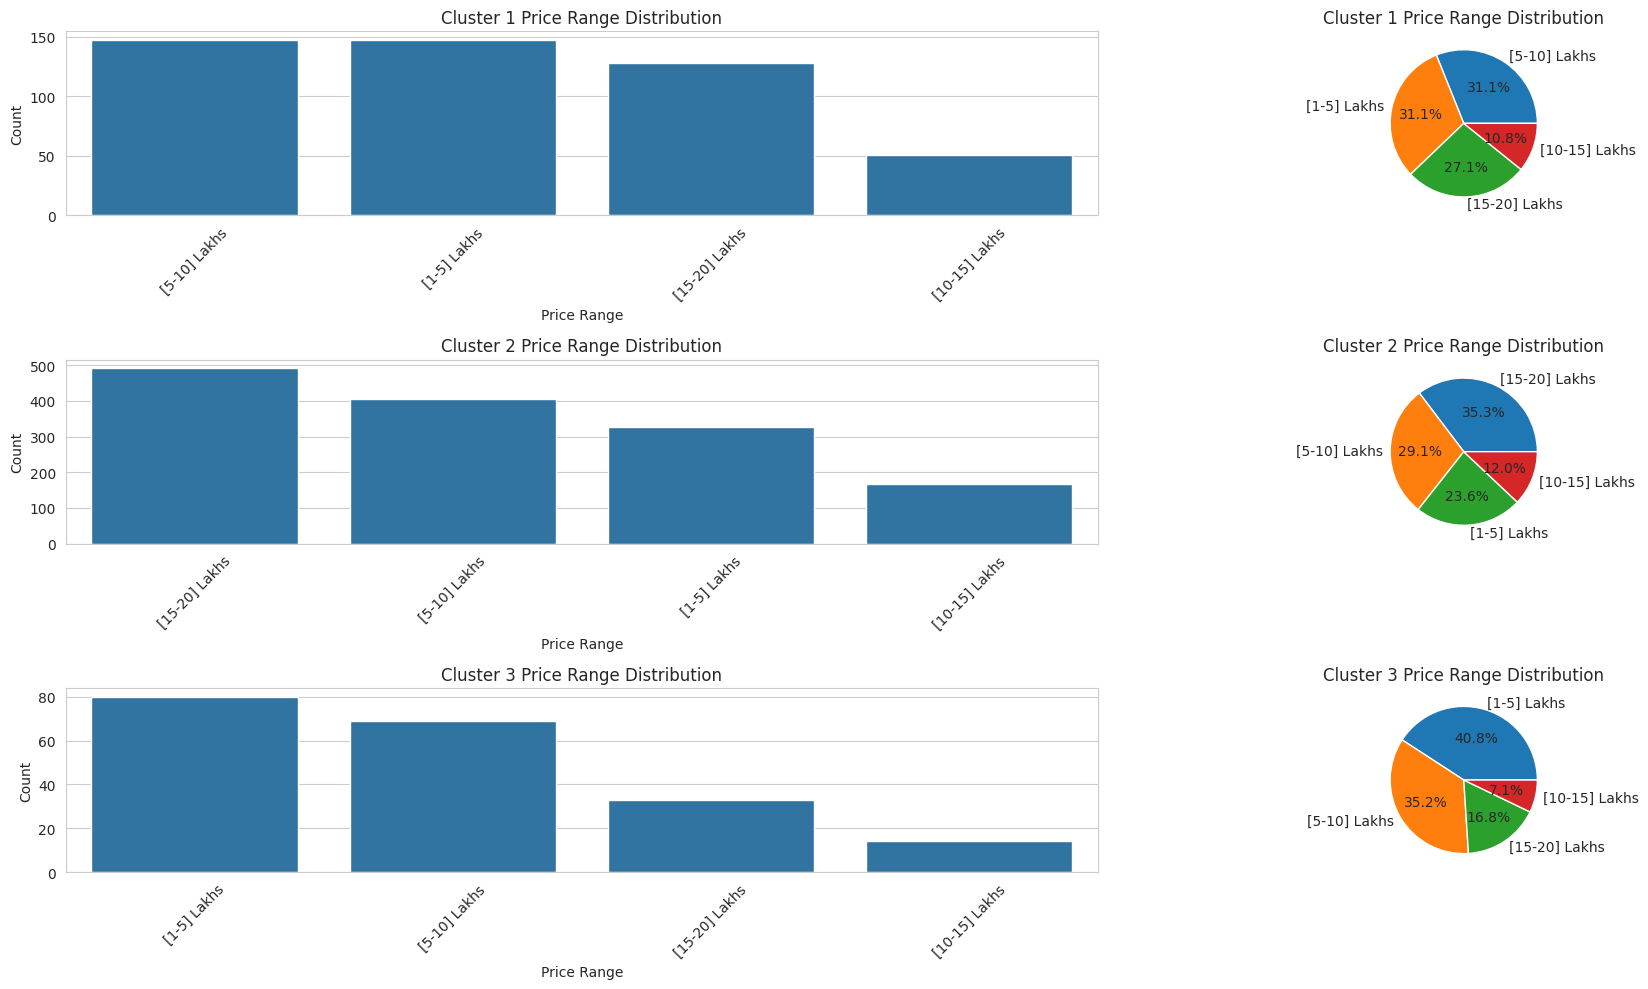

In [60]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# Create a list containing the counts of price values for each cluster
ct = [ct_1, ct_2, ct_3]

for i in range(3):
    # Bar plot
    sns.barplot(x=ct[i].index, y=ct[i], ax=ax[i, 0])
    ax[i, 0].set_xlabel("Price Range")
    ax[i, 0].set_xticklabels(ct[i].index, rotation=45)
    ax[i, 0].set_ylabel('Count')
    ax[i, 0].set_title(f'Cluster {i+1} Price Range Distribution')

    # Pie chart
    ax[i, 1].pie(ct[i], labels=ct[i].index, autopct="%1.1f%%")
    ax[i, 1].set_aspect('equal')  # To ensure the pie chart is circular
    ax[i, 1].set_title(f'Cluster {i+1} Price Range Distribution')

    # Show the plots for each cluster


plt.tight_layout()
plt.show()

In [61]:
makedf=pd.concat([lab,df["Make"]],axis=1)
make1=makedf[makedf["cluster"]==0]["Make"]
make2=makedf[makedf["cluster"]==1]["Make"]
make3=makedf[makedf["cluster"]==2]["Make"]

mk_cnt1=make1.value_counts()
mk_cnt2=make2.value_counts()
mk_cnt3=make3.value_counts()

mk_cnt=[mk_cnt1,mk_cnt2,mk_cnt3]

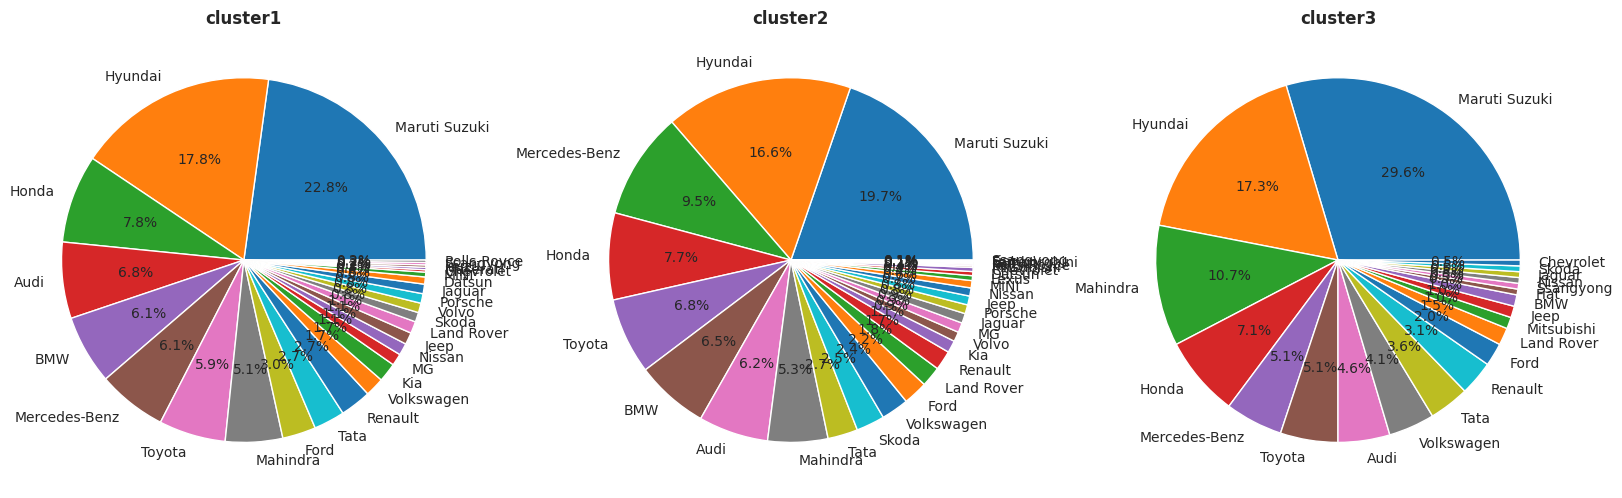

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,15,))
for i in range(3):
    ax[i].pie(mk_cnt[i],labels=mk_cnt[i].index,autopct="%1.1f%%")
    ax[i].set_title(f"cluster{i+1}", fontweight='bold')

plt.show()

Clearly we can see there is not much variation in the 3 clusters since the majority throughout is Maruti Suzuki. The first one being economy vehicles that provide good value for money, the second being being the same however Mercedes follows close by at 9.5% hinting a premium majority and third also has Maruti majority however it is more than clusters 1 and 2 at 30%. Mahindra closely follows at 10.7% hinting a majority in its reliable SUVs market which are also good value for money.